In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
# Define the directory where your data files are located
data_dir = '../data'

# Construct file paths using os.path.join()
file_facts = os.path.join(data_dir, 'PostNL_account_delivery_facts_anonymized.csv')
file_preference = os.path.join(data_dir, 'PostNL_account_delivery_preference_anonymized.csv')
file_packages = os.path.join(data_dir, 'PostNL_collo_packages_anonymized.csv')

# Read data into data frames
df_facts = pd.read_csv(file_facts)
df_preference = pd.read_csv(file_preference)
df_packages = pd.read_csv(file_packages)

# PostNL account delivery facts
* The analysis shows that there are no nans or abnormal variables present in the data. 
* The total number of parcels varies month to month, with some months showing higher variability.
* There's a difference between the number of parcels delivered and those successfully delivered to the home on the first try.
* Certain months may have anomalies or outliers in the number of parcels delivered which could be due to various factors (seasonal demand, promotions, shipping delays, etc.).
* The scatter plot with jitter effectively shows the distribution and density of the data points for each month, which the violin plot abstracts into a density shape.

In [3]:
df_facts.head()

,account_id_hashed,month_id,number_of_parcels,parcels_home_1st
0,5457d11e42f3ae7015c108101540ecbe976f435251dd48...,202312,1,0
1,934fde82f75da6bd9009ec91b5e6c41d4125ad7a800568...,202306,2,2
2,cf4d2dc40878806388a71751831739f8b8ae44c862602b...,202304,1,0
3,15f7038d43a059b614febe6fb369b7c524c94f3f45ceef...,202302,2,2
4,bcd4b13946631507ce8e227cabaaa5a52797a29cb7f703...,202306,9,8


In [4]:
df_facts.dtypes

account_id_hashed    object
month_id              int64
number_of_parcels     int64
parcels_home_1st      int64
dtype: object

In [5]:
df_facts.describe()

,month_id,number_of_parcels,parcels_home_1st
count,764000.000000,764000.000000,764000.000000
mean,202306.683471,4.297281,2.643473
std,3.442086,3.970002,3.116322
min,202301.000000,1.000000,0.000000
25%,202304.000000,2.000000,1.000000
50%,202307.000000,3.000000,2.000000
75%,202310.000000,6.000000,4.000000
max,202312.000000,224.000000,223.000000


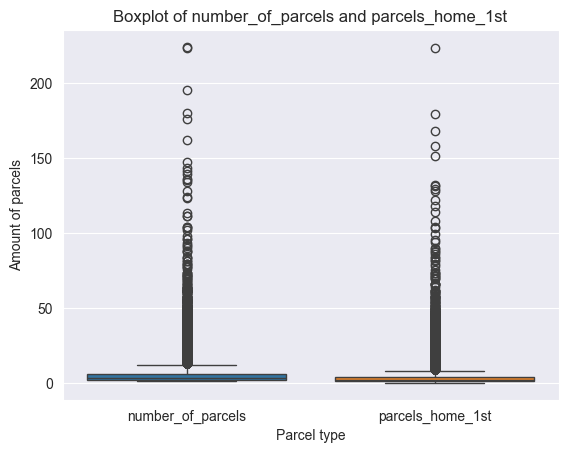

In [6]:
sns.boxplot(data=df_facts[['number_of_parcels', 'parcels_home_1st']])
plt.title('Boxplot of number_of_parcels and parcels_home_1st')
plt.xlabel('Parcel type')
plt.ylabel('Amount of parcels')
plt.show()

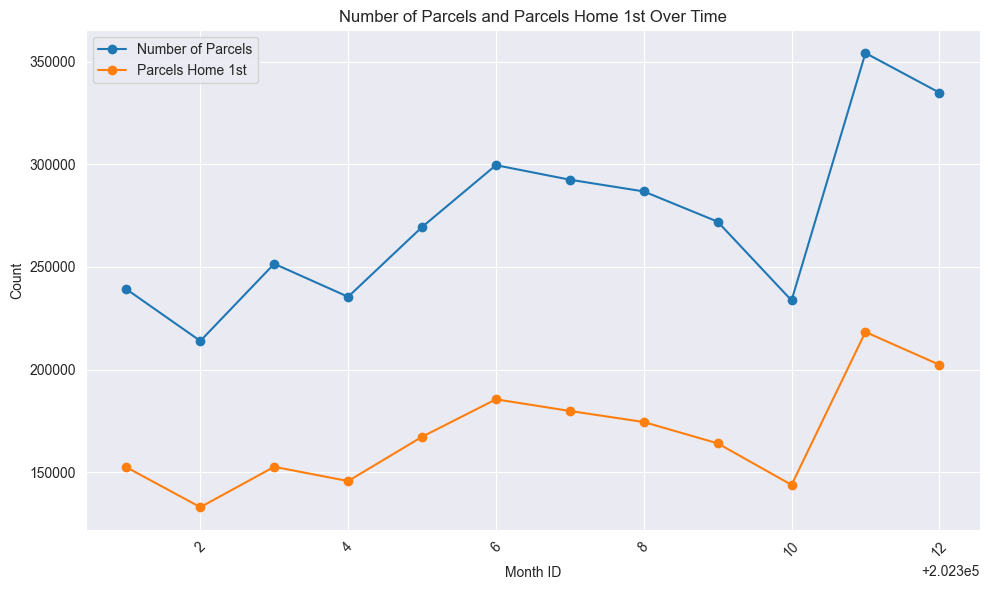

In [7]:
#Makes a visualisation of the number of parcels delivered each month 
df_facts_grouped_date = df_facts[['month_id', 'number_of_parcels', 'parcels_home_1st']].copy() #remove hased id 
df_facts_grouped_date = df_facts_grouped_date.groupby('month_id').sum()
df_facts_grouped_date.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_facts_grouped_date['month_id'], df_facts_grouped_date['number_of_parcels'],
         marker='o', label='Number of Parcels')
plt.plot(df_facts_grouped_date['month_id'], df_facts_grouped_date['parcels_home_1st'],
         marker='o', label='Parcels Home 1st')
plt.title('Number of Parcels and Parcels Home 1st Over Time')
plt.xlabel('Month ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\20193317\AppData\Local\Temp\ipykernel_12520\1374698264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month_parcels['month_id'] = pd.to_datetime(df_month_parcels['month_id'], format='%Y%m').dt.strftime('%Y-%m')


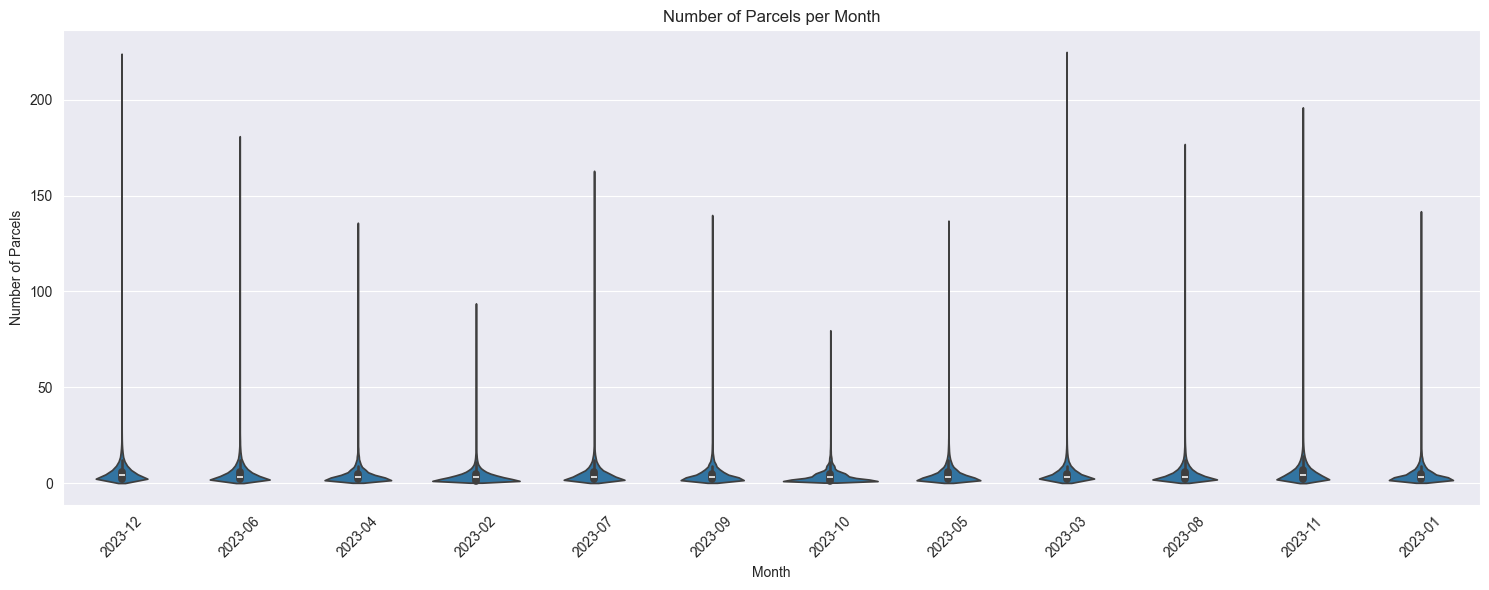

In [8]:
#subset of data only containing the month id and the number of parcels
df_month_parcels = df_facts[['month_id', 'number_of_parcels']]

# Convert month_id to a more readable format, "YYYY-MM", to make the plot more understandable
df_month_parcels['month_id'] = pd.to_datetime(df_month_parcels['month_id'], format='%Y%m').dt.strftime('%Y-%m')

# Create the violin plot
plt.figure(figsize=(15, 6))  # Adjust the figure size as necessary
sns.violinplot(x='month_id', y='number_of_parcels', data=df_month_parcels)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.title('Number of Parcels per Month')  # You can customize the title
plt.xlabel('Month')  # X-axis label
plt.ylabel('Number of Parcels')  # Y-axis label
plt.tight_layout()  # Adjust the layout to make sure everything fits without overlapping
plt.show()

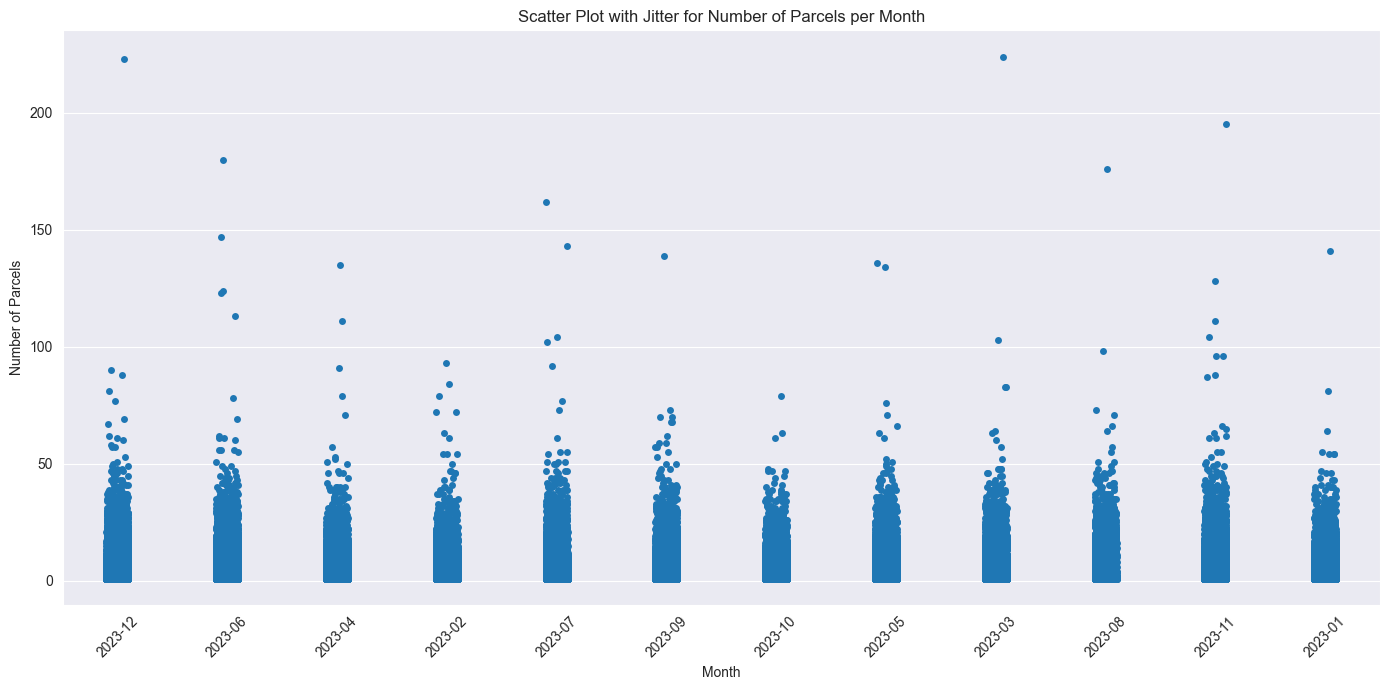

In [9]:
plt.figure(figsize=(14, 7))
sns.stripplot(x='month_id', y='number_of_parcels', data=df_month_parcels, jitter=True)
plt.xticks(rotation=45)
plt.title('Scatter Plot with Jitter for Number of Parcels per Month')
plt.xlabel('Month')
plt.ylabel('Number of Parcels')
plt.tight_layout()
plt.show()

# Post NL preferences
* The type of the columns that contain a date are objects however date time might be more suitable for analysis.
* This data **cannot** provide you information whether a customer changed their delivery preference since there are no duplicate accounts present. 
* Most accounts have OriginalDeliveryLocation as their preference, which I assume is their house.
* There are some NaN delivery preferences which should be changed to NULL values in the DB.
* I assume that all rows for which "datelastupdated" =! Nan the account has changed their delivery preference, but it should be validated. 
* Around 70% of the accounts does not have information about when the delivery preference was updated and created, therefore I assume that 70% of the users have not changed their delivery preference.
* Most packages are delivered on Tuesdays

In [10]:
df_preference.head()

,account_id_hashed,deliverypreference,datelastupdated,datecreated
0,f138fd8170177d0ab0540a7283dc8ece24b4c973c74676...,RetailLocation,NaN,NaN
1,0c7d026d754b63b91961a9744b3d5859a970eec7ff8a0b...,NaN,NaN,NaN
2,aeb21f320f1ad4e95a9cc28d70ffc638762446996b0167...,OriginalDeliveryLocation,2023-11-29 15:51:53.378,2023-11-29 15:51:53.378
3,b5487d5d909d37299b2b02a67669bd17a58af59fb8a9fb...,OriginalDeliveryLocation,NaN,NaN
4,ae5f2706023932c69597cb8aeafe571f42d4a020869621...,OriginalDeliveryLocation,NaN,NaN


In [11]:
#Check type
df_preference.dtypes

account_id_hashed     object
deliverypreference    object
datelastupdated       object
datecreated           object
dtype: object

In [12]:
# Convert date columns from object to datetime
df_preference['datelastupdated'] = pd.to_datetime(df_preference['datelastupdated'])
df_preference['datecreated'] = pd.to_datetime(df_preference['datecreated'])

In [13]:
#Check type
df_preference.dtypes

account_id_hashed             object
deliverypreference            object
datelastupdated       datetime64[ns]
datecreated           datetime64[ns]
dtype: object

In [14]:
#prints unique delivery preferences in the data
print(df_preference['deliverypreference'].unique())

['RetailLocation' nan 'OriginalDeliveryLocation' 'PublicParcelLocker'
 'ParcelLocker']


In [15]:
#Check for double account_id
duplicate_count = df_preference['account_id_hashed'].duplicated().sum()
print("Amount of duplicate account ids: {}".format(duplicate_count))

Amount of duplicate account ids: 0


In [16]:
#Amount of accounts for which there is no delivery preference known 
nan_count = df_preference['deliverypreference'].isna().sum()
print("Amount of accounts for which there is no delivery preference known:", nan_count)

#Change the NaN value to Unknown
df_preference['deliverypreference'] = df_preference['deliverypreference'].fillna('Unknown')
df_preference

Amount of accounts for which there is no delivery preference known: 6497


,account_id_hashed,deliverypreference,datelastupdated,datecreated
0,f138fd8170177d0ab0540a7283dc8ece24b4c973c74676...,RetailLocation,NaT,NaT
1,0c7d026d754b63b91961a9744b3d5859a970eec7ff8a0b...,Unknown,NaT,NaT
2,aeb21f320f1ad4e95a9cc28d70ffc638762446996b0167...,OriginalDeliveryLocation,2023-11-29 15:51:53.378,2023-11-29 15:51:53.378
3,b5487d5d909d37299b2b02a67669bd17a58af59fb8a9fb...,OriginalDeliveryLocation,NaT,NaT
4,ae5f2706023932c69597cb8aeafe571f42d4a020869621...,OriginalDeliveryLocation,NaT,NaT
...,...,...,...,...
249995,ac6e7e85b0e28818c2d9713bee07e72d854e65123b6b73...,OriginalDeliveryLocation,NaT,NaT
249996,791a4ca6391ebb2dca99180f488e2b7154d10b9da0d2f2...,RetailLocation,2023-12-21 07:11:24.969,2023-12-21 07:11:24.969
249997,e09700e70bbee9ea7af9d98a2c9a9159dfb16072493490...,OriginalDeliveryLocation,2023-11-29 22:13:05.579,2023-11-29 22:13:05.579
249998,cb6f931a275075a09701c5a6dfc9e83dff7fabc973e548...,OriginalDeliveryLocation,NaT,NaT


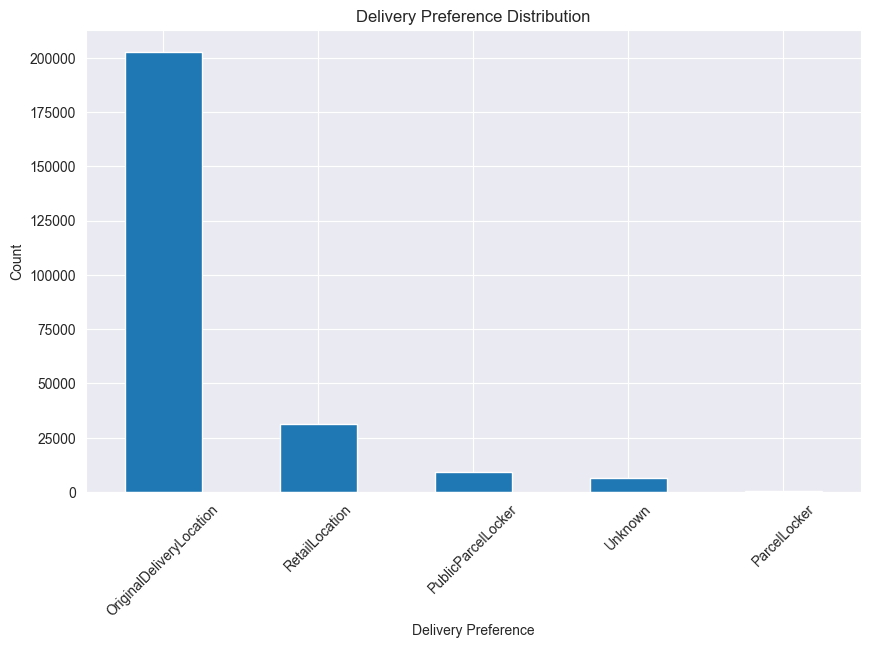

In [17]:
# Count the occurrence of each delivery preference
preference_counts = df_preference['deliverypreference'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
preference_counts.plot(kind='bar')
plt.xlabel('Delivery Preference')
plt.ylabel('Count')
plt.title('Delivery Preference Distribution')
plt.xticks(rotation=45)
plt.show()

In [18]:
nan_count = df_preference['datecreated'].isna().sum() #counts nans
not_nan = len(df_preference) - nan_count #counts not nans
percent = round(((not_nan/nan_count)*100), 1) #calculates percentage that is not nan

print("Amount of accounts for which there is no date created:", nan_count)
print("So amount of account for which there is a date created:", not_nan)
print("Therefore {}% of the accounts have a date created".format(percent))

Amount of accounts for which there is no date created: 192869
So amount of account for which there is a date created: 57131
Therefore 29.6% of the accounts have a date created


In [19]:
nan_count = df_preference['datelastupdated'].isna().sum() #counts nans
not_nan = len(df_preference) - nan_count #counts not nans
percent = round(((not_nan/nan_count)*100), 1) #calculates percentage that is not nan

print("Amount of accounts for which there is no date updated:", nan_count)
print("So amount of account for which there is a date date updated:", not_nan)
print("Therefore {}% of the accounts have a date updated".format(percent))

Amount of accounts for which there is no date updated: 192853
So amount of account for which there is a date date updated: 57147
Therefore 29.6% of the accounts have a date updated


In [20]:
df_packages.head()

,account_id_hashed,dn_barcode,da_datum_voormelding,da_datum_acceptatie,da_tijd_acceptatie,sa_dag_sortering1,sa_datum_sortering1,sa_tijd_sortering1,sa_datum_distributiecollectie,sa_tijd_distributiecollectie,...,ma_breedte,ma_lengte,ma_hoogte,ma_volume,PC4_gea,da_landcode_gea,da_resultaatgroepcode,da_resultaatcode,da_type_adres_gea,da_waarnemingsequence
0,NaN,2SDNSS7813585,2023-08-11,9999-03-03,Nvt,2023-08-11,2023-08-11,13:03:04,2023-08-12,10:21:47,...,NaN,NaN,NaN,NaN,2593,NL,02-Gecollecteerd,01-Gecollecteerd bij eerste poging,Particulier,A01F01A98B01A95A95J01J04A19A19J05J44J44J44C01
1,c117c089ed76c9fa183c2deabccb5ce175dd33be70f2bd...,2SILBS7670502,2023-07-28,9999-03-03,Nvt,2023-07-28,2023-07-28,12:38:24,2023-07-29,08:53:51,...,NaN,NaN,NaN,NaN,1107,NL,02-Gecollecteerd,01-Gecollecteerd bij eerste poging,Particulier,A04A01F01A98A95B01A95J01J04A19A19J05C01
2,5bff61c87e83b8d77ea2a380de1f18fe52c5ef82ab3a90...,2SILBS8859972,2023-08-28,9999-03-03,Nvt,2023-08-28,2023-08-28,12:11:33,2023-08-29,09:04:34,...,NaN,NaN,NaN,NaN,6844,NL,02-Gecollecteerd,01-Gecollecteerd bij eerste poging,Particulier,A04A01A98F01A95B01A95J01J04A19J05A19C01
3,NaN,2SPIAG022039715,2023-11-07,9999-03-03,Nvt,9999-03-03,9999-03-03,Nvt,9999-03-03,Nvt,...,NaN,NaN,NaN,NaN,3911,NL,06-Voorgemeld,01-Voormelding,Gemengd,F01A95C01J70
4,NaN,2SPIAG223999827,2023-09-07,9999-03-03,Nvt,9999-03-03,9999-03-03,Nvt,9999-03-03,Nvt,...,NaN,NaN,NaN,NaN,3911,NL,06-Voorgemeld,01-Voormelding,Gemengd,F01C01J70


In [21]:
df_packages.columns

Index(['account_id_hashed', 'dn_barcode', 'da_datum_voormelding',
       'da_datum_acceptatie', 'da_tijd_acceptatie', 'sa_dag_sortering1',
       'sa_datum_sortering1', 'sa_tijd_sortering1',
       'sa_datum_distributiecollectie', 'sa_tijd_distributiecollectie',
       'da_datum_herroutering_voor_up1', 'da_tijd_herroutering_voor_up1',
       'da_datum_eindstatus', 'da_tijd_eindstatus', 'ma_gewicht', 'ma_breedte',
       'ma_lengte', 'ma_hoogte', 'ma_volume', 'PC4_gea', 'da_landcode_gea',
       'da_resultaatgroepcode', 'da_resultaatcode', 'da_type_adres_gea',
       'da_waarnemingsequence'],
      dtype='object')

In [22]:
df_packages.dtypes

account_id_hashed                  object
dn_barcode                         object
da_datum_voormelding               object
da_datum_acceptatie                object
da_tijd_acceptatie                 object
sa_dag_sortering1                  object
sa_datum_sortering1                object
sa_tijd_sortering1                 object
sa_datum_distributiecollectie      object
sa_tijd_distributiecollectie       object
da_datum_herroutering_voor_up1     object
da_tijd_herroutering_voor_up1      object
da_datum_eindstatus                object
da_tijd_eindstatus                 object
ma_gewicht                        float64
ma_breedte                        float64
ma_lengte                         float64
ma_hoogte                         float64
ma_volume                         float64
PC4_gea                             int64
da_landcode_gea                    object
da_resultaatgroepcode              object
da_resultaatcode                   object
da_type_adres_gea                 

In [23]:
#Change all columns that contain an date or time to a datetime format for further analysis 
date_time_columns_list = list(df_packages.columns)[2:14]

for column in date_time_columns_list:
    # Using errors='coerce' to convert out-of-bounds or unparseable dates to NaT
    df_packages[column] = pd.to_datetime(df_packages[column], errors='coerce')
    
    if 'tijd' in column.lower(): 
        df_packages[column] = df_packages[column].dt.time

df_packages

C:\Users\20193317\AppData\Local\Temp\ipykernel_12520\1064946943.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_packages[column] = pd.to_datetime(df_packages[column], errors='coerce')
C:\Users\20193317\AppData\Local\Temp\ipykernel_12520\1064946943.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_packages[column] = pd.to_datetime(df_packages[column], errors='coerce')
C:\Users\20193317\AppData\Local\Temp\ipykernel_12520\1064946943.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_packages[column] = pd.to_datetime(df_packages[column], errors='coerce')
C:\User

,account_id_hashed,dn_barcode,da_datum_voormelding,da_datum_acceptatie,da_tijd_acceptatie,sa_dag_sortering1,sa_datum_sortering1,sa_tijd_sortering1,sa_datum_distributiecollectie,sa_tijd_distributiecollectie,...,ma_breedte,ma_lengte,ma_hoogte,ma_volume,PC4_gea,da_landcode_gea,da_resultaatgroepcode,da_resultaatcode,da_type_adres_gea,da_waarnemingsequence
0,NaN,2SDNSS7813585,2023-08-11,NaT,NaT,2023-08-11,2023-08-11,13:03:04,2023-08-12,10:21:47,...,NaN,NaN,NaN,NaN,2593,NL,02-Gecollecteerd,01-Gecollecteerd bij eerste poging,Particulier,A01F01A98B01A95A95J01J04A19A19J05J44J44J44C01
1,c117c089ed76c9fa183c2deabccb5ce175dd33be70f2bd...,2SILBS7670502,2023-07-28,NaT,NaT,2023-07-28,2023-07-28,12:38:24,2023-07-29,08:53:51,...,NaN,NaN,NaN,NaN,1107,NL,02-Gecollecteerd,01-Gecollecteerd bij eerste poging,Particulier,A04A01F01A98A95B01A95J01J04A19A19J05C01
2,5bff61c87e83b8d77ea2a380de1f18fe52c5ef82ab3a90...,2SILBS8859972,2023-08-28,NaT,NaT,2023-08-28,2023-08-28,12:11:33,2023-08-29,09:04:34,...,NaN,NaN,NaN,NaN,6844,NL,02-Gecollecteerd,01-Gecollecteerd bij eerste poging,Particulier,A04A01A98F01A95B01A95J01J04A19J05A19C01
3,NaN,2SPIAG022039715,2023-11-07,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,3911,NL,06-Voorgemeld,01-Voormelding,Gemengd,F01A95C01J70
4,NaN,2SPIAG223999827,2023-09-07,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,3911,NL,06-Voorgemeld,01-Voormelding,Gemengd,F01C01J70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,e178154d1d68016acab3da60bd22188d9ade2f465a9229...,3SOPKC803997423,2023-11-15,2023-11-15,14:27:56,2023-11-16,2023-11-16,18:33:14,2023-11-17,11:00:02,...,255.0,380.0,150.0,14535.0,5976,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Gemengd,A98A01A95B01G03B01A95J01J40A19A19J05I03
999996,NaN,3SOPKC804118879,2023-11-13,2023-11-13,15:03:43,2023-11-13,2023-11-13,19:45:06,2023-11-14,12:11:19,...,250.0,300.0,120.0,9000.0,1324,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Particulier,A98A01A95B01B01A95J01J04J40A19A19J05I01
999997,68402b71cf46084061e6c5ee4e432a91ac60e74cc287d8...,3SOPKC805854002,2023-11-05,2023-11-06,11:05:46,2023-11-06,2023-11-06,21:36:07,2023-11-07,12:06:14,...,500.0,580.0,190.0,55100.0,9204,NL,01-Afgeleverd,04-Uitgereikt via afhaalkantoor,Particulier,A98A01A95B01B01A95A65J01J40A19A19J55J30J30K70J...
999998,957bfcdfc1a62a2269445f7851167ec45dc78e1d5e202b...,3SOPKC806259014,2023-07-19,2023-07-19,16:41:54,2023-07-19,2023-07-19,23:25:51,NaT,NaT,...,485.0,865.0,220.0,92295.0,7335,NL,03-In Process,02-Sortering,Particulier,A98A01A95B04J70B01A95A02


In [24]:
# Check for duplicate rows
duplicate_rows = df_packages[df_packages.duplicated()]
duplicate_rows

,account_id_hashed,dn_barcode,da_datum_voormelding,da_datum_acceptatie,da_tijd_acceptatie,sa_dag_sortering1,sa_datum_sortering1,sa_tijd_sortering1,sa_datum_distributiecollectie,sa_tijd_distributiecollectie,...,ma_breedte,ma_lengte,ma_hoogte,ma_volume,PC4_gea,da_landcode_gea,da_resultaatgroepcode,da_resultaatcode,da_type_adres_gea,da_waarnemingsequence


**Account ID**

In [25]:
#Checks how many packages are linked to an account
packages_without_account = df_packages['account_id_hashed'].isna().sum()
percentage_not_linked = round(((packages_without_account/len(df_packages))*100), 1)

print("The total amont of packages which are not linked to a specific acount:", packages_without_account)
print("Precentage of packages not linked to an account: {}%".format(percentage_not_linked))

The total amont of packages which are not linked to a specific acount: 384653
Precentage of packages not linked to an account: 38.5%


In [26]:
# Remove rows where 'account_id_hashed' is NaN
df_cleaned = df_packages.dropna(subset=['account_id_hashed'])

# Now, find duplicates in the cleaned DataFrame
duplicated_mask = df_cleaned['account_id_hashed'].duplicated(keep=False)
duplicated_account_ids = df_cleaned[duplicated_mask]
duplicated_account_ids

,account_id_hashed,dn_barcode,da_datum_voormelding,da_datum_acceptatie,da_tijd_acceptatie,sa_dag_sortering1,sa_datum_sortering1,sa_tijd_sortering1,sa_datum_distributiecollectie,sa_tijd_distributiecollectie,...,ma_breedte,ma_lengte,ma_hoogte,ma_volume,PC4_gea,da_landcode_gea,da_resultaatgroepcode,da_resultaatcode,da_type_adres_gea,da_waarnemingsequence
1,c117c089ed76c9fa183c2deabccb5ce175dd33be70f2bd...,2SILBS7670502,2023-07-28,NaT,NaT,2023-07-28,2023-07-28,12:38:24,2023-07-29,08:53:51,...,NaN,NaN,NaN,NaN,1107,NL,02-Gecollecteerd,01-Gecollecteerd bij eerste poging,Particulier,A04A01F01A98A95B01A95J01J04A19A19J05C01
122,41379791c42856952c07f3dcea1d4bc1d22ee0fdf04da1...,3SAASS3494089,2023-10-18,NaT,NaT,2023-10-19,2023-10-19,19:38:10,2023-10-20,08:26:52,...,260.0,345.0,160.0,14352.0,2801,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Particulier,A01A98A95M02A04B01A96J01J40A19A19J05I01
126,9e9fcad1e48794865f3a8b48c2df05ec06cb3dd3347bc8...,3SAASS4145178,2023-09-01,NaT,NaT,2023-09-01,2023-09-01,19:10:28,2023-09-02,12:37:37,...,255.0,350.0,160.0,14280.0,6691,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Particulier,A98A01A95B01A96A65J01J40A19J05A19I01
152,dcde65b304a8b2cfd5d9132e52b393ec2ef578cad5435b...,3SAAWE258639439,2023-10-07,NaT,NaT,2023-10-09,2023-10-10,00:34:12,2023-10-10,09:59:03,...,245.0,285.0,210.0,14663.0,5124,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Particulier,A98A01A95B01A96J01J01J40A19J05A19I01
153,dcde65b304a8b2cfd5d9132e52b393ec2ef578cad5435b...,3SAAWE258639439,2023-10-07,NaT,NaT,2023-10-10,2023-10-10,00:34:12,2023-10-10,09:59:03,...,245.0,285.0,210.0,14663.0,5124,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Particulier,A98A01A95B01A96J01J01J40A19J05A19I01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999972,2b30071ae31ea1907e7a0cd3a4d83119c7fd2a6ac295b5...,3SOPKC786109546,2023-11-22,2023-11-23,15:33:53,2023-11-23,2023-11-23,22:17:56,2023-11-24,08:19:25,...,410.0,595.0,395.0,96360.0,3311,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Gemengd,A01A98A95B01B01A95J01J40A19A19J05I01
999974,831ff31e297d738d0669185ea0ca0206f548697cc6e926...,3SOPKC787204981,2023-11-30,2023-12-01,11:43:51,2023-12-01,2023-12-01,18:25:27,2023-12-02,10:38:02,...,270.0,365.0,215.0,21188.0,3941,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Particulier,A98A01A95B01B01A95J01J40A19A19J05I01
999983,a4a5ea5c4193b1cb9a7d793f342ce0f1cfc2d1bd0fd570...,3SOPKC798456921,2023-11-20,2023-11-20,17:02:16,2023-11-20,2023-11-20,19:09:02,2023-11-21,09:24:58,...,145.0,150.0,160.0,3480.0,5038,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Particulier,A98A01A95B01B01A95J01J40A19A19J05I01
999990,6ae835250aeea52118b1e6f7caa15eac1438d31049f219...,3SOPKC802818384,2023-07-04,2023-07-04,15:21:41,2023-07-04,2023-07-04,22:50:24,2023-07-05,09:25:06,...,385.0,405.0,360.0,56133.0,2312,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Gemengd,A98A01A95B01B01A95J01J40A19A19J05I01


In [27]:
# Check id which has ordered the most packages according to df_packages
most_frequent_account_id_hashed = df_packages['account_id_hashed'].value_counts().idxmax()
print(most_frequent_account_id_hashed)

696d0cff331b6b26d8672faa9285fdda7bbb7d616ca122ed6880020e00311313


In [28]:
df_packages[df_packages['account_id_hashed'] == '696d0cff331b6b26d8672faa9285fdda7bbb7d616ca122ed6880020e00311313']

,account_id_hashed,dn_barcode,da_datum_voormelding,da_datum_acceptatie,da_tijd_acceptatie,sa_dag_sortering1,sa_datum_sortering1,sa_tijd_sortering1,sa_datum_distributiecollectie,sa_tijd_distributiecollectie,...,ma_breedte,ma_lengte,ma_hoogte,ma_volume,PC4_gea,da_landcode_gea,da_resultaatgroepcode,da_resultaatcode,da_type_adres_gea,da_waarnemingsequence
774297,696d0cff331b6b26d8672faa9285fdda7bbb7d616ca122...,3SMYPA038826696,2023-10-26,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,4585,NL,06-Voorgemeld,03-Definitief Manco,Particulier,A98A01A95M02M01
774827,696d0cff331b6b26d8672faa9285fdda7bbb7d616ca122...,3SMYPA047230928,2023-10-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,4585,NL,06-Voorgemeld,01-Voormelding,Particulier,A98A01A95
776103,696d0cff331b6b26d8672faa9285fdda7bbb7d616ca122...,3SMYPA068205873,2023-11-15,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,4585,NL,06-Voorgemeld,03-Definitief Manco,Particulier,A98A01A95M02M01
777287,696d0cff331b6b26d8672faa9285fdda7bbb7d616ca122...,3SMYPA085852326,2023-10-20,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,4585,NL,06-Voorgemeld,03-Definitief Manco,Particulier,A01A98A95M02M01
778279,696d0cff331b6b26d8672faa9285fdda7bbb7d616ca122...,3SMYPA102290413,2023-10-02,2023-10-04,08:33:38,2023-10-04,2023-10-04,20:55:14,2023-10-05,09:39:15,...,130.0,185.0,95.0,2285.0,4585,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Particulier,A01A98A95M02B01B01A96J01J40A19J05A19I01
781726,696d0cff331b6b26d8672faa9285fdda7bbb7d616ca122...,3SMYPA157944178,2023-09-24,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,4585,NL,06-Voorgemeld,01-Voormelding,Particulier,A98A01A95
782469,696d0cff331b6b26d8672faa9285fdda7bbb7d616ca122...,3SMYPA170308977,2023-11-10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,4585,NL,06-Voorgemeld,03-Definitief Manco,Particulier,A98A01A95M02M01
782809,696d0cff331b6b26d8672faa9285fdda7bbb7d616ca122...,3SMYPA175365420,2023-10-02,2023-10-03,12:26:01,2023-10-03,2023-10-03,21:21:00,2023-10-04,09:50:19,...,145.0,200.0,150.0,4350.0,4585,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Particulier,A98A01A95M02B01B01A96J01J40A19J05A19I01
785172,696d0cff331b6b26d8672faa9285fdda7bbb7d616ca122...,3SMYPA213607086,2023-10-26,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,4585,NL,06-Voorgemeld,03-Definitief Manco,Particulier,A01A98A95M02M01
785712,696d0cff331b6b26d8672faa9285fdda7bbb7d616ca122...,3SMYPA222184255,2023-11-22,2023-11-23,13:29:51,2023-11-23,2023-11-23,22:21:40,2023-11-24,09:32:33,...,160.0,220.0,120.0,4224.0,4585,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Particulier,A98A01A95M02B01B01A96J01J40A19J05A19I01


**Barcodes**

In [29]:
#Check amount of duplicate barcodes
duplicate_barcodes = df_packages[df_packages.duplicated('dn_barcode', keep=False)]['dn_barcode'].unique()
print("Amount of duplicate barcodes:", len(duplicate_barcodes))

Amount of duplicate barcodes: 2700


**Landcode**

In [30]:
#Are there any packages delived else then NL
df_packages['da_landcode_gea'].unique()

array(['NL'], dtype=object)

**Eindstatus**

In [31]:
df_eindstatus = df_packages[["account_id_hashed", "da_datum_eindstatus", "da_tijd_eindstatus"]]
df_eindstatus

,account_id_hashed,da_datum_eindstatus,da_tijd_eindstatus
0,NaN,2023-08-12,14:35:30
1,c117c089ed76c9fa183c2deabccb5ce175dd33be70f2bd...,2023-07-29,11:32:34
2,5bff61c87e83b8d77ea2a380de1f18fe52c5ef82ab3a90...,2023-08-29,11:00:17
3,NaN,NaT,NaT
4,NaN,NaT,NaT
...,...,...,...
999995,e178154d1d68016acab3da60bd22188d9ade2f465a9229...,2023-11-17,20:54:15
999996,NaN,2023-11-14,12:58:58
999997,68402b71cf46084061e6c5ee4e432a91ac60e74cc287d8...,2023-11-08,16:07:59
999998,957bfcdfc1a62a2269445f7851167ec45dc78e1d5e202b...,NaT,NaT


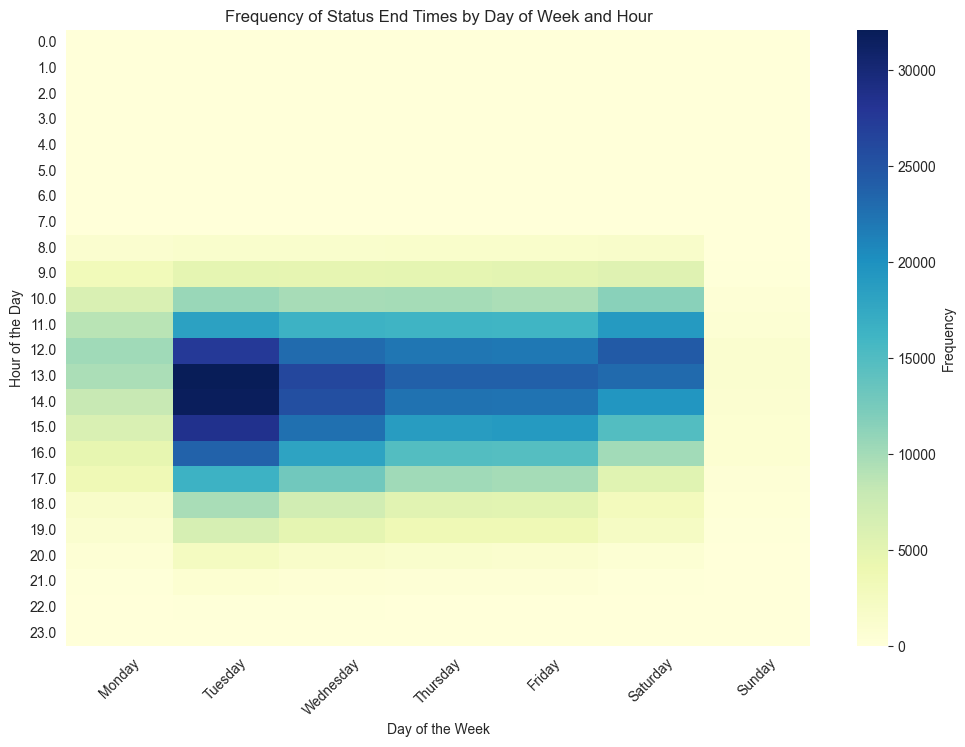

In [32]:
# Convert 'da_datum_eindstatus' to datetime to extract the day of the week
df_packages['da_datum_eindstatus'] = pd.to_datetime(df_packages['da_datum_eindstatus'])
df_packages['weekday'] = df_packages['da_datum_eindstatus'].dt.day_name()

# Convert 'da_tijd_eindstatus' to a categorical time slot (consider hourly slots)
df_packages['hour'] = pd.to_datetime(df_packages['da_tijd_eindstatus'], format='%H:%M:%S').dt.hour

# Aggregate data to count occurrences per weekday and hour
heatmap_data = df_packages.groupby(['hour', 'weekday']).size().unstack(fill_value=0)

# Sort the data by days of the week in correct order
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Ensure the columns are in the correct weekday order
heatmap_data = heatmap_data[sorter]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, cbar_kws={'label': 'Frequency'})
plt.title('Frequency of Status End Times by Day of Week and Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45)
plt.show()


**Waarnemings sequence**

Analysis shows that waarnemings sequence cannot be derived from the columns in the data

In [33]:
df_waarneming = df_packages[['da_waarnemingsequence']].copy()
df_waarneming['amount'] = 1
df_waarneming_grouped = df_waarneming.groupby('da_waarnemingsequence').sum()
df_waarneming_grouped.reset_index()

,da_waarnemingsequence,amount
0,A01,15
1,A01A01,4
2,A01A01A01A01A01A01A01A98A95A98A98A98A98M02J61B...,1
3,A01A01A01A01A98A95A98M02J61B01A95A65J01J40A19A...,1
4,A01A01A01A01A98A95A98M02J61B01A95J01J40J04A19A...,1
...,...,...
96457,M02A98A01A95B01A96A19A18A65J01J40J05I01,3
96458,M02A98A01A95M01,1
96459,P02A03A95A04A01A98B01A96J01J40A19A19J05I01,1
96460,P03A03A95A98A01B01A96J01J40A19J05A19I01,1


In [34]:
df_waarneming_grouped['amount'].describe()

count    96462.000000
mean        10.366777
std        276.079305
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      37706.000000
Name: amount, dtype: float64

In [35]:
# Sort the DataFrame by the column containing the values
sorted_df = df_waarneming_grouped.sort_values(by='amount', ascending=False)

# Keep only the top 10 values
top_10 = sorted_df.head(10)
top_10

,amount
da_waarnemingsequence,
A98A01A95B01A96J01J40A19A19J05I01,37706
A01A98A95B01A96J01J40A19A19J05I01,34524
A98A01A96B01A96J01J40A19A19J05I01,31175
A01A98A96B01A96J01J40A19A19J05I01,28033
A98A01A95B01B01A96J01J40A19A19J05I01,16481
A98A01A95B01A96J01J40A19J05A19I01,15147
A01A98A95B01A96J01J40A19J05A19I01,13791
A98A01A96B01A96J01J40A19J05A19I01,12431
A98A01A95B01J01A18J05I05,12423


In [36]:
def find_similarities(df, da_waarnemingsequence_values=None):
    
    """
    Identifies columns with identical values within groups of a DataFrame, grouped by 'da_waarnemingsequence'.
    It filters by specific values if provided, then returns a dictionary of these similarities for each group.

    Parameters:
    - df (pd.DataFrame): DataFrame to analyze.
    - da_waarnemingsequence_values (optional): Specific value(s) to filter the DataFrame by. Can be None, a string, or a list of strings.

    Returns:
    - dict: A dictionary with 'da_waarnemingsequence' values as keys and dictionaries of similar columns and their values as values.
    """
        
    # If specific values are provided, filter the DataFrame to include only those groups
    if da_waarnemingsequence_values is not None:
        if isinstance(da_waarnemingsequence_values, list):
            df = df[df['da_waarnemingsequence'].isin(da_waarnemingsequence_values)]
        else:
            df = df[df['da_waarnemingsequence'] == da_waarnemingsequence_values]
    
    # Grouping the DataFrame by 'da_waarnemingsequence'
    grouped = df.groupby('da_waarnemingsequence')
    results = {}

    for name, group in grouped:
        # Dictionary to hold similarities for the current group
        similarities = {}
        for column in group.columns:
            # Skip the grouping column
            if column == 'da_waarnemingsequence':
                continue
            # Check if all values in the column are the same
            if group[column].nunique() == 1:
                # Add to similarities
                similarities[column] = group[column].iloc[0]
        # Add the similarities for the current group to the results
        if similarities:
            results[name] = similarities
    
    return results

# Example usage for a specific value of 'da_waarnemingsequence'
similarities = find_similarities(df_packages, 'A98A01A95B01A96J01J40A19A19J05I01')
print(similarities)

# Example usage for multiple specific values of 'da_waarnemingsequence'
# similarities = find_similarities(df_packages, ['value1', 'value2'])
# print(similarities)

{'A98A01A95B01A96J01J40A19A19J05I01': {'da_landcode_gea': 'NL'}}


# Delivery facts & collo packages

Here I analyse whether the person that received the most packages in the delivery facts also appears as many times in the collo packages because this should be consistent.

Analysis shows that it is not consistent, further validation why is needed. 

In [37]:
#check if the range of the dates are comparable 

# Finding the earliest date
min_date_packages = df_packages['da_datum_eindstatus'].min()
min_date_facts = df_facts['month_id'].min()

# Finding the latest date
max_date_packages = df_packages['da_datum_eindstatus'].max()
max_date_facts = df_facts['month_id'].max()

print(f"The date range from df_packages is from {min_date_packages} to {max_date_packages}")
print(f"The date range from df_facts is from {min_date_facts} to {max_date_facts}")

The date range from df_packages is from 2023-07-01 00:00:00 to 2024-01-06 00:00:00
The date range from df_facts is from 202301 to 202312


In [38]:
#Check who received the most packages according to the delivery facts 

#groups account by id 
df_total_parcels_per_id = df_facts[['account_id_hashed', 'number_of_parcels']].copy().groupby('account_id_hashed').sum()

# Sort the DataFrame by the column containing the values
sorted_df = df_total_parcels_per_id.sort_values(by='number_of_parcels', ascending=False)
sorted_df = sorted_df.reset_index()
sorted_df

,account_id_hashed,number_of_parcels
0,908fe142fefbae580726fc2ca82cee401a43f6636d958c...,803
1,7f677f826dddfc53da131a63e94c8c00ae0b24df609e8f...,529
2,0ccc5a9cbfa29f95a8f10b7053e479db244f8f72ecd470...,408
3,dfba4883395375be1c714d007b45ba21c0c99e06ecf6f7...,394
4,77526804c0a51c98ee8981688b445618983fdd8824f706...,391
...,...,...
275291,6500045e7e4b37fa667875962e3388f669bb4ca152dfd8...,1
275292,64fcc55bd57f33bf3a82f458aa93d09b697598615943ca...,1
275293,64f9c3df203242bd72477694603836fd15ca9e07ec2104...,1
275294,64f94b974f6a60f9bdb51a4bfeda32948acf4fbfc17609...,1


In [39]:
# Check the months in which the customer received packages
account_most_packages = sorted_df['account_id_hashed'].iloc[0]
df_facts[df_facts['account_id_hashed'] == account_most_packages]

,account_id_hashed,month_id,number_of_parcels,parcels_home_1st
307204,908fe142fefbae580726fc2ca82cee401a43f6636d958c...,202305,134,129
369756,908fe142fefbae580726fc2ca82cee401a43f6636d958c...,202307,162,158
385846,908fe142fefbae580726fc2ca82cee401a43f6636d958c...,202301,141,131
465921,908fe142fefbae580726fc2ca82cee401a43f6636d958c...,202308,176,168
475704,908fe142fefbae580726fc2ca82cee401a43f6636d958c...,202304,111,104
567840,908fe142fefbae580726fc2ca82cee401a43f6636d958c...,202310,79,78


In [40]:
#Check if this customer also appears as many times in the collo packages
df_packages[df_packages['account_id_hashed'] == account_most_packages]

,account_id_hashed,dn_barcode,da_datum_voormelding,da_datum_acceptatie,da_tijd_acceptatie,sa_dag_sortering1,sa_datum_sortering1,sa_tijd_sortering1,sa_datum_distributiecollectie,sa_tijd_distributiecollectie,...,ma_hoogte,ma_volume,PC4_gea,da_landcode_gea,da_resultaatgroepcode,da_resultaatcode,da_type_adres_gea,da_waarnemingsequence,weekday,hour
31850,908fe142fefbae580726fc2ca82cee401a43f6636d958c...,3SBLCR159749053,2023-07-01,2023-07-01,16:44:10,2023-07-02,2023-07-02,22:29:30,2023-07-03,09:12:40,...,90.0,1350.0,4461,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Gemengd,A01A98A95B01B01A96J01J40A19A19J05I01,Monday,9.0
32281,908fe142fefbae580726fc2ca82cee401a43f6636d958c...,3SBLCR222453914,2023-08-23,2023-08-24,10:20:00,2023-08-24,2023-08-24,21:13:22,2023-08-25,09:27:59,...,80.0,7300.0,4461,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Gemengd,A98A01A95M02B01B01A96J01J40A19A19J05I01,Friday,10.0
32492,908fe142fefbae580726fc2ca82cee401a43f6636d958c...,3SBLCR254506911,2023-07-22,2023-07-22,14:22:45,2023-07-23,2023-07-23,19:16:00,2023-07-24,09:19:04,...,55.0,2200.0,4461,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Gemengd,A98A01A95B01B01A96J01J40A19A19J05I01,Monday,9.0
34891,908fe142fefbae580726fc2ca82cee401a43f6636d958c...,3SBLCR626873257,2023-11-01,2023-11-01,12:36:19,2023-11-01,2023-11-01,20:57:16,2023-11-02,08:47:20,...,65.0,5636.0,4461,NL,01-Afgeleverd,01-Uitgereikt bij eerste uitreikpoging,Gemengd,A98A01A95B01B01A96J01J40A19J05A19I01,Thursday,9.0


# Possibility for data enrichment 
We could add additional data to prove that the model can perform with newly added data, in this case 4 digit postal code information in the Netherlands.
Github repo: https://github.com/bobdenotter/4pp